<a href="https://colab.research.google.com/github/atejap05/pos_data_science_furg/blob/main/disciplinas/Machine_Learning_I/semana07/Furg_ECD_07_Machine_Learning_I_Redes_neurais_(parte_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Especialização em Ciência de Dados - FURG
## Machine Learning I - Redes Neurais (parte 1)
### Prof. Marcelo Malheiros

Código adaptado de Aurélien Geron (licença Apache-2.0)

---

FUNDAMENTOS

Redes neurais (parte 1)

- Introdução e breve histórico
- O modelo Perceptron
- Backpropagation
- Função de ativação
- Arquitetura de classificadores MLP

# Inicialização

Aqui importamos as bibliotecas fundamentais de Python para este _notebook_:

- NumPy: suporte a vetores, matrizes e operações de Álgebra Linear
- Matplotlib: biblioteca de visualização de dados
- Pandas: pacote estatístico e de manipulação de DataFrames
- Scikit-Learn: biblioteca com algoritmos de Machine Learning

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

Este _notebook_, em particular, utiliza a biblioteca Keras para definir e treinar redes neurais. Aqui utilizamos a versão **integrada** de Keras, que já vem como parte da biblioteca mais geral TensorFlow.

Em geral é mais fácil usar a versão integrada de Keras, pois esta está pronta para usar a Tensorflow, sem risco de incompatibilidade.

Ambas já fazem parte do ambiente Colaboratory.

**Atenção:** para quem utiliza o ambiente Jupyter, é preciso primeiro instalar o pacote `tensorflow`. Na linha de comando isso pode ser feito assim:

    conda install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

print('tensorflow:      versão', tf.__version__)
print('keras integrada: versão', keras.__version__)

tensorflow:      versão 2.4.1
keras integrada: versão 2.4.0


Este _notebook_ também utiliza a biblioteca `pydot` e a ferramenta Graphviz para visualizar as redes neurais. 

Ambos já fazem parte do ambiente Colaboratory.

**Atenção:** para quem utiliza o ambiente Jupyter, é preciso primeiro instalar os pacotes `pydot` e `graphviz`. Na linha de comando isso pode ser feito assim:

    conda install pydot graphviz

In [3]:
import pydot

# Perceptrons

A biblioteca Scikit-Learn fornece um algoritmo `Perceptron` que implementa uma arquitetura com um único neurônio TLU.

Esta rede neural pode ser usada diretamente como um classificador binário. Aqui o exemplo é feito com o _dataset_ IRIS.

Ao contrário dos classificadores de regressão logística, os Perceptrons não geram uma probabilidade de classe. Em vez disso, eles apenas fazem previsões com base em um limite rígido. Esta é uma das boas razões para preferir o algoritmo `LogisticRegression` ao invés do `Perceptron`.

In [4]:
# leitura do dataset

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]  # comprimento da pétala, largura da pétala
y = (iris.target == 0).astype(np.int)

# criação e treinamento do modelo

from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [5]:
# previsão

y_pred = per_clf.predict([[2, 0.5]])
y_pred[0]

1

O código abaixo obtém o coeficiente e o ponto de interseção da fronteira de decisão (no caso, uma reta) e a exibe, junto com algumas instâncias do conjunto de treino.

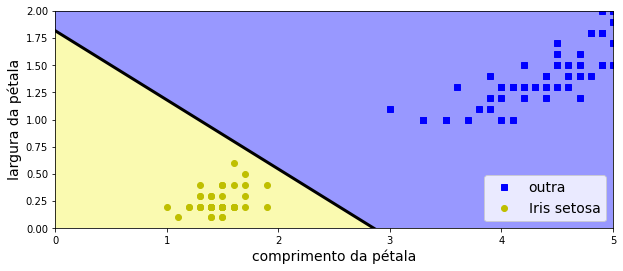

In [6]:
# não se preocupe com os detalhes deste código

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
                     np.linspace(axes[2], axes[3], 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label='outra')
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label='Iris setosa')
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], 'k-', linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel('comprimento da pétala', fontsize=14)
plt.ylabel('largura da pétala', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)
plt.show()

# Construindo um classificador de imagens

O primeiro passo é carregar um conjunto de daos. No caso, usamos aqui o _dataset_ **Fashion MNIST**, com imagens reduzidas de roupas. A biblioteca Keras tem várias funções para carregar conjuntos de dados populares em `keras.datasets`. 

O conjunto de dados já está dividido entre instâncias de treinamento e de teste, mas a seguir iremos dividir o conjunto de treinamento para ter um conjunto de validação.

Cada instância é uma imagem em tons de cinza (com valores de 0 a 255) e com resolução 28 por 28 _pixels_. Note que esse _dataset_ foi feito para ser compatível com o conjunto **MNIST** original, tendo a mesma resolução, número de instâncias e número de classes (10), porém sendo mais desafiador de classificar.

In [7]:
# importação do dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print('treinamento completo:', X_train_full.shape)
print('testes:              ', X_test.shape)

4423680/4422102 [==============================] - 2s 0us/step
treinamento completo: (60000, 28, 28)
testes:               (10000, 28, 28)


Aqui o conjunto completo de treinamento é quebrado em dois, um de treinamento menor e outro de validação. Também é feita a conversão dos valores inteiros de tons de cinza (de 0 a 255) para um vaor real no intervalo de 0 a 1.

In [8]:
# separação dos dados de treinamento e validação
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
print('treinamento:', X_train.shape)
print('validação:   ', X_valid.shape)

treinamento: (55000, 28, 28)
validação:    (5000, 28, 28)


Abaixo é exibida primeira instância do conjunto de treino:

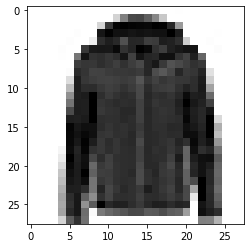

In [9]:
plt.imshow(X_train[0], cmap='binary')
plt.show()

Os rótulos são valores inteiros de 0 a 9, quardados nos vetores `y` e que correspondem aos seguintes nomes de classes.

Então a instância 0 é um **casaco**.

In [10]:
class_names = ['camiseta', 'calça', 'pulôver', 'vestido', 'casaco',
               'sandália', 'camisa', 'tênis', 'bolsa', 'bota']
class_names[y_train[0]]

'casaco'

Abaixo é exibido um mosaico com várias instâncias do conjunto de treino:

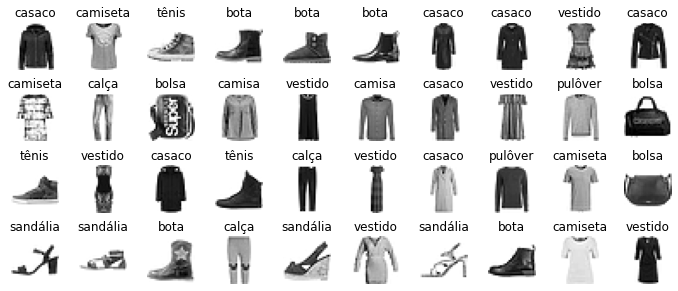

In [11]:
# não se preocupe com este código

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Criando uma rede neural

Aqui vamos criar uma rede neural de classificação, usando um modelo (ou arquitetura) do tipo sequencial. O modelo sequencial corresponde ao tipo mais simples de rede neural, onde uma sequência de camadas de neurônios é empilhada uma em cima da outra.

- A criação começa com a chamada a `Sequential`, que define o tipo do modelo:

        model = keras.models.Sequential()

- Então uma camada do tipo `Flatten` é adicionada. Seu papel é apenas transformar a matriz de _pixels_ em um longo vetor. É uma camada de preprocessamento dos dados. Mas como esta é a primeira camada, é preciso definir o formato da entrada com `input_shape`:

        model.add(keras.layers.Flatten(input_shape=[28, 28]))

- A seguir adicionamos uma camada densa do tipo `Dense`, ou seja, totalmente conectada com a camada anterior. Esta conta com 300 neurônios e função de ativação ReLU:

        model.add(keras.layers.Dense(300, activation='relu'))
        
- Então uma segunda camada `Dense` é adicionada, agora com 100 neurônios e função de ativação também ReLU:
        
        model.add(keras.layers.Dense(100, activation='relu'))
        
- Finalmente uma camada de saída é adicionada. Aqui o tipo também é `Dense`, mas a função de ativação é trocada para `softmax` para produzir a saída de classificador (uma vez que as classes são mutuamente exclusivas):
        
        model.add(keras.layers.Dense(10, activation='softmax'))

Ainda que se possa criar uma rede neural com as diversas chamadas a `model.add(...)`, é mais conveniente criar o modelo passando uma lista de camadas, como mostrado a seguir.

In [12]:
# comando para 'zerar' a biblioteca Keras
keras.backend.clear_session()

# definição de sementes aleatórias
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
# especificação do modelo
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
# resumo legível da arquitetura deste modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note que as camadas densas geralmente têm muitos parâmetros. Por exemplo, a primeira camada densa tem pesos de conexão de 784 × 300, além de mais 300 termos de _bias_, chegando a um total de 235.500 parâmetros.

Isso dá ao modelo bastante flexibilidade para ajustar os dados de treinamento, mas também significa que o modelo corre o risco de ter _overfitting_, especialmente quando não há muitos dados de treinamento.

## Arquitetura da rede neural

Podemos gerar uma figura da arquitetura deste modelo usando a função `keras.utils.plot_model`.

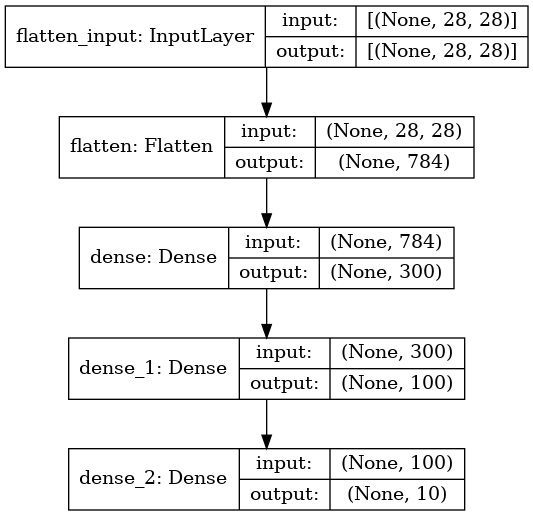

In [16]:
keras.utils.plot_model(model, 'fashion_mnist_model.png', show_shapes=True)

## Acesso às camadas

A biblioteca permite acessar cada camada criada, usando índices de acesso tal como em uma lista de Python.

Permite também ver atributos de cada camada, como o nome ou se é uma camada oculta. E ainda permite inspecionar os pesos de todas as conexões daquela camada.

In [17]:
# acesso a cada uma das camadas
model.layers

In [18]:
# primeira camada e respectivo nome
hidden1 = model.layers[1]
hidden1.name

'dense'

In [19]:
# encontra camada pelo nome
model.get_layer(hidden1.name)

In [20]:
# indica se a camada é ou não oculta
model.get_layer(hidden1.name) is hidden1

True

Observe que a camada `Dense` inicializa os pesos das conexão aleatoriamente. Os vieses foram inicializados apenas com zero.

In [21]:
# obtém pesos e vieses da camada
weights, biases = hidden1.get_weights()
print('weights:', weights.shape)
print('biases: ', biases.shape)

weights: (784, 300)
biases:  (300,)


In [22]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compilando a rede neural

Depois que um modelo é criado, é preciso chamar o método `compile()`, especificando a **função de perda** (aqui, a função `sparse_categorical_crossentropy`) e o **otimizador** a ser usado (`sgd`, algoritmo de descida do gradiente estocástico).

Opcionalmente, você também pode especificar uma lista de **medidas de desempenho** extras para calcular durante o treinamento e avaliação. Neste caso apenas é indicada a acurácia com `accuracy`.

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', 
              metrics=['accuracy'])

# Treinando e avaliando a rede neural

Para treinar o modelo basta chamar o método `fit()`. 

Três parâmetros são obrigatórios: as _features_ de treinamento, os rótulos de treinamento e o número de épocas.

Cada **época** (_epoch_) corresponde a uma etapa de atualização da rede neural.

Opcionalemente é passado também um conjunto de validação. A biblioteca Keras medirá a perda e as métricas extras ao final de cada época, o que é muito útil para ver como o modelo realmente funciona: se o desempenho no conjunto de treinamento é muito melhor do que no conjunto de validação, provavelmente está ocorrendo _overfitting_.

In [25]:
# esta chamada pode demorar um pouco
%time
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 1.0187 - accuracy: 0.6807 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/25
1719/1719 [==============================] - 1s 859us/step - loss: 0.5028 - accuracy: 0.8260 - val_loss: 0.4348 - val_accuracy: 0.8536
Epoch 3/25
1719/1719 [==============================] - 2s 879us/step - loss: 0.4485 - accuracy: 0.8423 - val_loss: 0.5292 - val_accuracy: 0.8002
Epoch 4/25
1719/1719 [==============================] - 1s 864us/step - loss: 0.4210 - accuracy: 0.8530 - val_loss: 0.3916 - val_accuracy: 0.8644
Epoch 5/25
1719/1719 [==============================] - 2s 880us/step - loss: 0.4062 - accuracy: 0.8581 - val_loss: 0.3751 - val_accuracy: 0.8680
Epoch 6/25
1719/1719 [==============================] - 1s 872us/step - loss: 0.3756 - accuracy: 0.8672 - val_loss: 0.3714 - val_accuracy: 0.8716
Epoch 7/25
1719/1719 [==============================] - 2s 877us/step - loss: 0.3656 - accuracy: 0.8709 - val_loss: 0.3623 - v

In [26]:
# os dados do treinamento estão disponíveis no histórico retornado
print('parâmetros:', history.params)
print('métricas:  ', list(history.history.keys()))
print('épocas:    ', history.epoch)

parâmetros: {'verbose': 1, 'epochs': 25, 'steps': 1719}
métricas:   ['loss', 'accuracy', 'val_loss', 'val_accuracy']
épocas:     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


## Visualização da evolução das métricas ao longo do treinamento

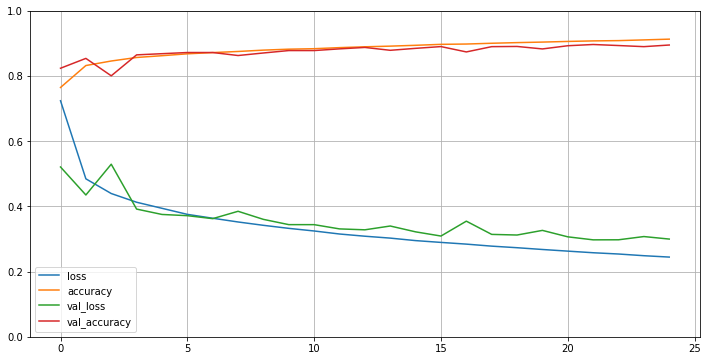

In [27]:
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Avaliação final do modelo e geração de previsões

In [28]:
# avaliação com conjunto de teste
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 700us/step - loss: 0.3336 - accuracy: 0.8808


[0.3335908353328705, 0.8808000087738037]

In [29]:
# probabilidades computadas para três instâncias de teste
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0.   0.   0.   0.   0.   0.02 0.   0.02 0.   0.96]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [30]:
# classes previstas e reais para as mesmas três instâncias de teste
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('previstas: ', np.array(class_names)[y_pred])
print('reais:     ', np.array(class_names)[y_test[:3]])

previstas:  ['bota' 'pulôver' 'calça']
reais:      ['bota' 'pulôver' 'calça']


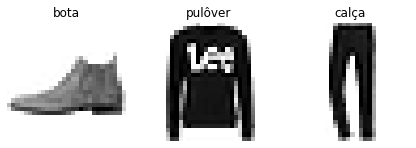

In [31]:
# visualização das tres instâncias
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()